


Epoch 1/3

8/8 [==============================] - 0s 753us/step - loss: 0.2468
Epoch 2/3
8/8 [==============================] - 0s 887us/step - loss: 0.2427
Epoch 3/3
1/1 [==============================] - 0s 83ms/step


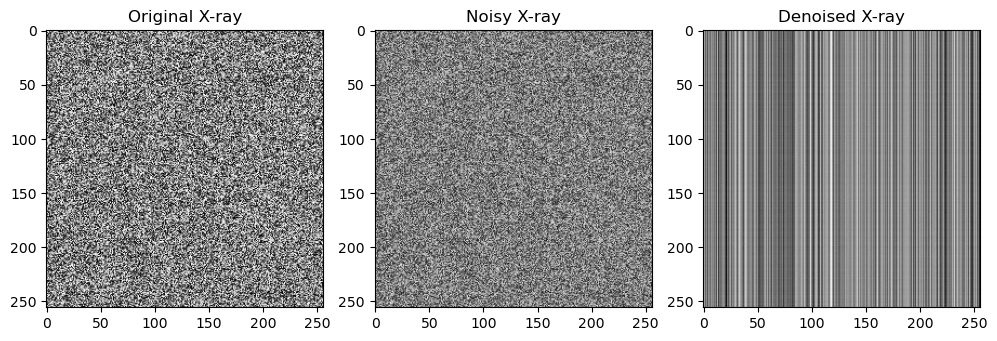

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
x_ray_image = np.random.rand(256, 256)
noisy_x_ray = x_ray_image + np.random.normal(0, 0.1, x_ray_image.shape)
x_ray_image = x_ray_image / 255.0
noisy_x_ray = noisy_x_ray / 255.0
input_layer = Input(shape=(256, 256))
encoded = Dense(128, activation='relu')(input_layer)
decoded = Dense(256, activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(noisy_x_ray, x_ray_image, epochs=3)
denoised_x_ray = autoencoder.predict(np.expand_dims(noisy_x_ray, axis=0))
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(x_ray_image, cmap='gray')
plt.title("Original X-ray")
plt.subplot(1, 3, 2)
plt.imshow(noisy_x_ray, cmap='gray')
plt.title("Noisy X-ray")
plt.subplot(1, 3, 3)
plt.imshow(denoised_x_ray[0], cmap='gray')
plt.title("Denoised X-ray")
plt.tight_layout()
plt.show()